<a href="https://colab.research.google.com/github/aayisha-muhammed/Datasceince/blob/main/Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_data = pd.read_csv('/content/Training_data.csv')
test_data = pd.read_csv('/content/Testing_data.csv')

In [ ]:
train_data.head()
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


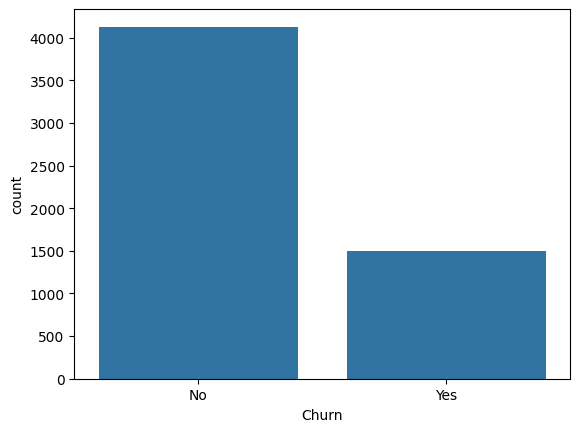

In [ ]:
sns.countplot(x='Churn', data=train_data)
plt.show()



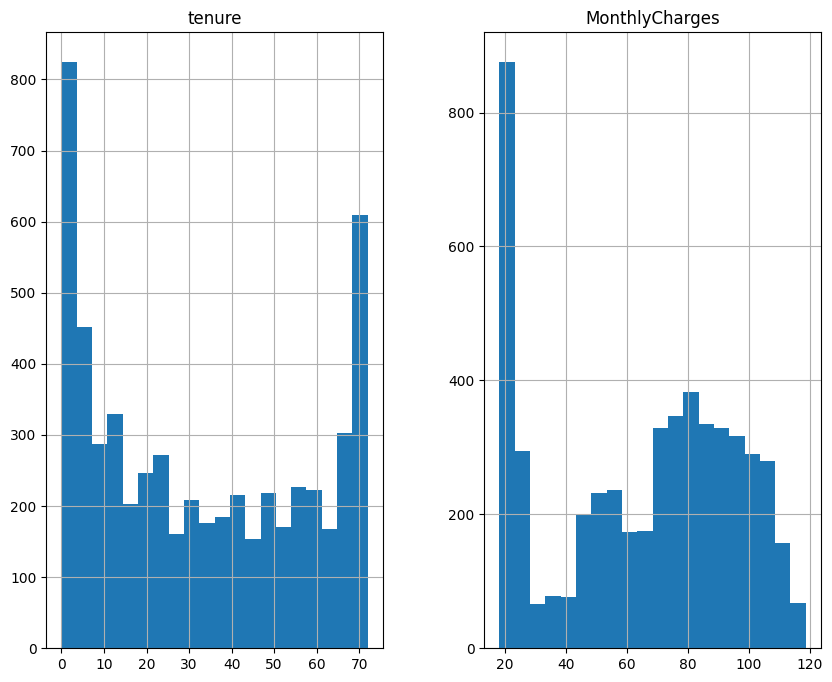

In [ ]:
train_data[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(10, 8))
plt.show()

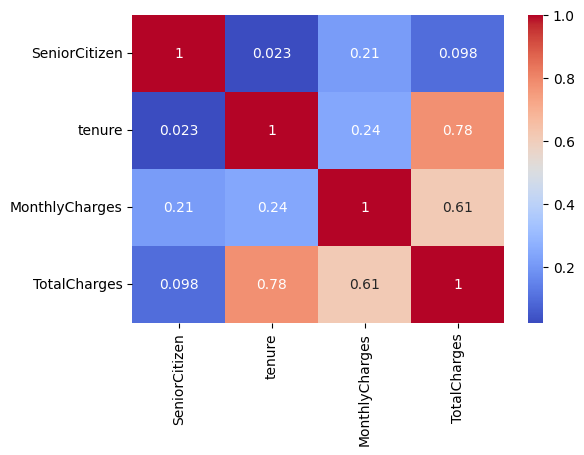

In [ ]:
plt.figure(figsize=(6, 4))
numerical_columns = train_data.select_dtypes(include=['number'])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


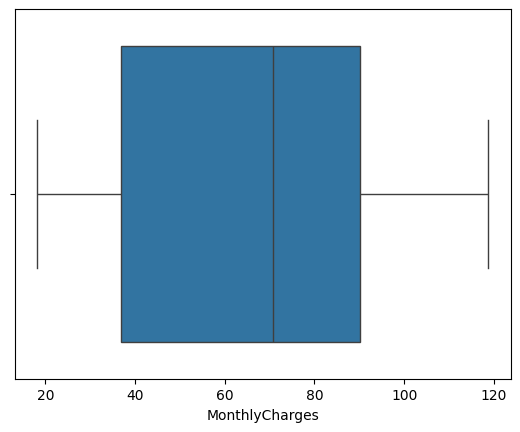

In [ ]:

train_data.isnull().sum()
sns.boxplot(x='MonthlyCharges', data=train_data)
plt.show()


In [ ]:
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
train_data['TotalCharges'].fillna(train_data['TotalCharges'].median(), inplace=True)


<ipython-input-17-14985f64cdf1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['TotalCharges'].fillna(train_data['TotalCharges'].median(), inplace=True)


In [ ]:
train_data['Partner'] = train_data['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
train_data = pd.get_dummies(train_data, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(train_data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:

Q1 = train_data['MonthlyCharges'].quantile(0.25)
Q3 = train_data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
train_data = train_data[~((train_data['MonthlyCharges'] < (Q1 - 1.5 * IQR)) | (train_data['MonthlyCharges'] > (Q3 + 1.5 * IQR)))]


In [ ]:
train_data['tenure_Contract'] = train_data['tenure'] * train_data['Contract_Two year']
train_data['CustomerLifetimeValue'] = train_data['tenure'] * train_data['MonthlyCharges']


In [ ]:
print(train_data.columns)
X = train_data.drop(columns=['Churn'])
y = train_data['Churn']
if 'customerID' in X.columns:
    X = X.drop(columns=['customerID'])
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col])
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric and will be dropped.")
            X = X.drop(columns=[col])

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'tenure_Contract',
       'CustomerLifetimeValue', 'gender_Male'],
      dtype='object')
Column 'Dependents' could not be converted to numeric and will be dropped.
Column 'PhoneService' could not be converted to numeric and will be dropped.
Column 'MultipleLines' could not be converted to numeric and will be dropped.
Column 'OnlineSecurity' could not be converted to numeric and will be dropped.
Column 'OnlineBackup' could not be converted to numeric and will be dropped.
Colu

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)
y_pred_lr = lr.predict(X_val_imputed)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


gb = GradientBoostingClassifier()

gb.fit(X_train_imputed, y_train)
y_pred_gb = gb.predict(X_val_imputed)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print(classification_report(y_val, y_pred_gb))

Logistic Regression Accuracy: 0.7852706299911268
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       803
           1       0.65      0.54      0.59       324

    accuracy                           0.79      1127
   macro avg       0.74      0.71      0.72      1127
weighted avg       0.78      0.79      0.78      1127

Random Forest Accuracy: 0.771960958296362
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       803
           1       0.64      0.48      0.55       324

    accuracy                           0.77      1127
   macro avg       0.72      0.68      0.70      1127
weighted avg       0.76      0.77      0.76      1127

Gradient Boosting Accuracy: 0.7790594498669032
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       803
           1       0.65      0.50      0.57       324

    accuracy                           0.78 

In [ ]:
from sklearn.metrics import roc_auc_score


print("Logistic Regression AUC:", roc_auc_score(y_val, y_pred_lr))
print("Random Forest AUC:", roc_auc_score(y_val, y_pred_rf))
print("Gradient Boosting AUC:", roc_auc_score(y_val, y_pred_gb))


Logistic Regression AUC: 0.7112333379456668
Random Forest AUC: 0.6844030103162524
Gradient Boosting AUC: 0.6958281444582815


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}


grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", grid_rf.best_params_)


y_pred_rf_tuned = grid_rf.predict(X_val)
print("Tuned Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf_tuned))
print("Tuned Random Forest AUC:", roc_auc_score(y_val, y_pred_rf_tuned))


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.7755102040816326
Tuned Random Forest AUC: 0.6878142152114755
